In [1]:
from pathlib import Path
import sys, os
libs_path = (Path(os.path.abspath(os.path.join('..'))).parent)
sys.path.append(str(libs_path))

In [2]:

from sklearn.cluster import KMeans
import numpy as np
from libs import corpus
from libs import storage

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [3]:
def buildViewClusters(dataset_name: str):
    loaded_tfidf_matrix = storage.get_tfidf_matrix(dataset_name)

    k_means = KMeans(n_clusters=25)
    clusters = k_means.fit_predict(loaded_tfidf_matrix)

    counts = np.bincount(clusters)
    for i, count in enumerate(counts):
        print(f'Cluster {i} has {count} vectors')

    storage.save_means(k_means, dataset_name=dataset_name)
    storage.save_clusters(clusters=clusters, dataset_name=dataset_name)
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    reduced_data = svd.fit_transform(loaded_tfidf_matrix)

    # Plot the clusters
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter, ticks=range(25))
    plt.xlabel('SVD Component 1')
    plt.ylabel('SVD Component 2')
    plt.title(f'2D Visualization of Clusters for {dataset_name} Dataset')
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 has 8028 vectors
Cluster 1 has 8844 vectors
Cluster 2 has 12385 vectors
Cluster 3 has 5691 vectors
Cluster 4 has 4358 vectors
Cluster 5 has 9733 vectors
Cluster 6 has 19293 vectors
Cluster 7 has 12752 vectors
Cluster 8 has 5985 vectors
Cluster 9 has 183707 vectors
Cluster 10 has 18176 vectors
Cluster 11 has 6235 vectors
Cluster 12 has 2257 vectors
Cluster 13 has 16233 vectors
Cluster 14 has 5178 vectors
Cluster 15 has 5941 vectors
Cluster 16 has 3837 vectors
Cluster 17 has 6342 vectors
Cluster 18 has 4012 vectors
Cluster 19 has 14328 vectors
Cluster 20 has 15866 vectors
Cluster 21 has 8056 vectors
Cluster 22 has 3077 vectors
Cluster 23 has 15089 vectors
Cluster 24 has 8263 vectors


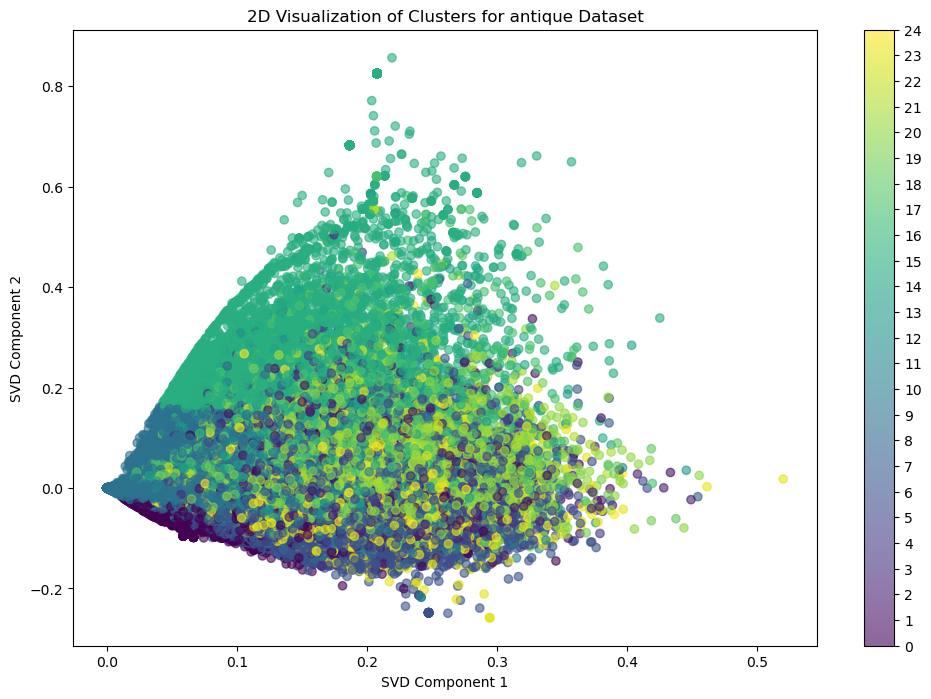

Cluster 0 has 106457 vectors
Cluster 1 has 2468 vectors
Cluster 2 has 7941 vectors
Cluster 3 has 10649 vectors
Cluster 4 has 7824 vectors
Cluster 5 has 4697 vectors
Cluster 6 has 2123 vectors
Cluster 7 has 9120 vectors
Cluster 8 has 2354 vectors
Cluster 9 has 3860 vectors
Cluster 10 has 13705 vectors
Cluster 11 has 2680 vectors
Cluster 12 has 4210 vectors
Cluster 13 has 3429 vectors
Cluster 14 has 7838 vectors
Cluster 15 has 3894 vectors
Cluster 16 has 9141 vectors
Cluster 17 has 8016 vectors
Cluster 18 has 19437 vectors
Cluster 19 has 3009 vectors
Cluster 20 has 7925 vectors
Cluster 21 has 3439 vectors
Cluster 22 has 3743 vectors
Cluster 23 has 18292 vectors
Cluster 24 has 2642 vectors


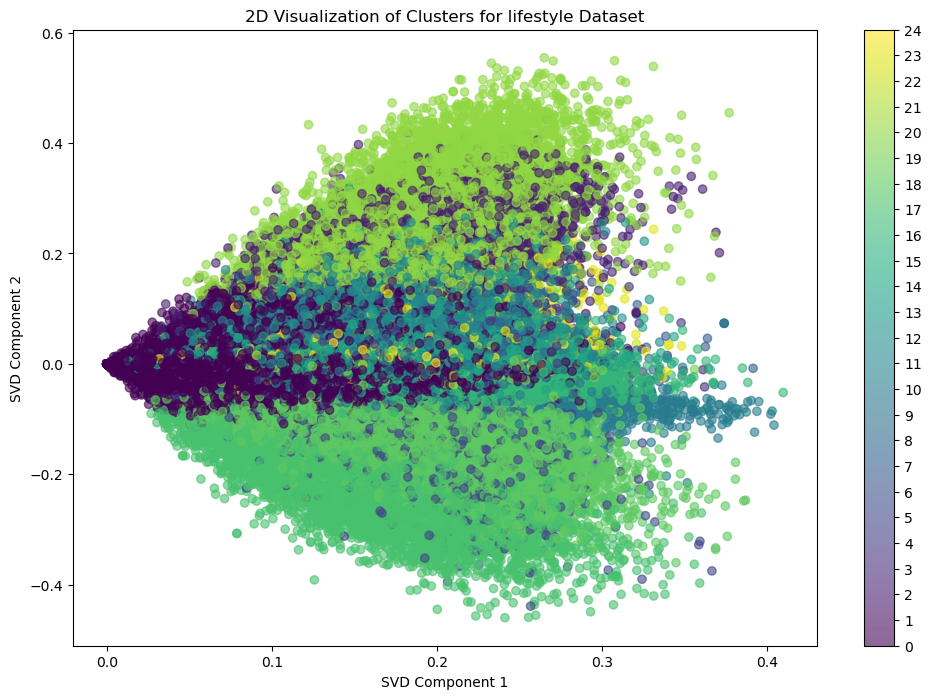

In [4]:
buildViewClusters('antique')
buildViewClusters('lifestyle')